In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as s_graph
import pprint
import string
from nltk.corpus import stopwords

In [2]:
data = pd.read_csv(r'text_emotion.csv')
data

,tweet_id,sentiment,author,content
0,1956967341,empty,xoshayzers,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,wannamama,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,coolfunky,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,czareaquino,wants to hang out with friends SOON!
4,1956968416,neutral,xkilljoyx,@dannycastillo We want to trade with someone w...
...,...,...,...,...
39995,1753918954,neutral,showMe_Heaven,@JohnLloydTaylor
39996,1753919001,love,drapeaux,Happy Mothers Day All my love
39997,1753919005,love,JenniRox,Happy Mother's Day to all the mommies out ther...
39998,1753919043,happiness,ipdaman1,@niariley WASSUP BEAUTIFUL!!! FOLLOW ME!! PEE...


In [3]:
data.shape 

(40000, 4)

In [4]:
data.dtypes

tweet_id      int64
sentiment    object
author       object
content      object
dtype: object

In [5]:
data.isnull().sum()  #Checking the data have any error or empty spaced

tweet_id     0
sentiment    0
author       0
content      0
dtype: int64

In [6]:
data['sentiment'].value_counts()

neutral       8638
worry         8459
happiness     5209
sadness       5165
love          3842
surprise      2187
fun           1776
relief        1526
hate          1323
empty          827
enthusiasm     759
boredom        179
anger          110
Name: sentiment, dtype: int64

<AxesSubplot:>

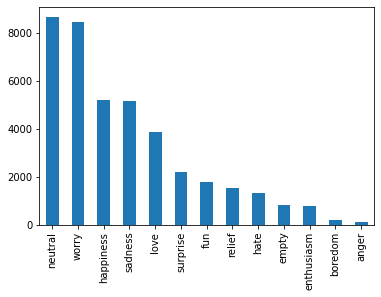

In [7]:
data['sentiment'].value_counts().plot(kind='bar')

In [8]:
tweets = data['content']

In [9]:
def lower_case():
    for x in range(len(tweets)):
        tweets[x] = tweets[x].lower()

In [10]:
lower_case()

<ipython-input-9-77449a9f33b8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets[x] = tweets[x].lower()


In [11]:
pprint.pprint(tweets)

0        @tiffanylue i know  i was listenin to bad habi...
1        layin n bed with a headache  ughhhh...waitin o...
2                      funeral ceremony...gloomy friday...
3                     wants to hang out with friends soon!
4        @dannycastillo we want to trade with someone w...
                               ...                        
39995                                     @johnlloydtaylor
39996                       happy mothers day  all my love
39997    happy mother's day to all the mommies out ther...
39998    @niariley wassup beautiful!!! follow me!!  pee...
39999    @mopedronin bullet train from tokyo    the gf ...
Name: content, Length: 40000, dtype: object


In [12]:
def remove_punctuation():
    for x in range(len(tweets)):
        word = tweets[x].translate(str.maketrans('','',string.punctuation))
        tweets[x] = word

In [13]:
remove_punctuation()

<ipython-input-12-c81a4350e69f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets[x] = word


In [14]:
print(tweets)

0        tiffanylue i know  i was listenin to bad habit...
1        layin n bed with a headache  ughhhhwaitin on y...
2                            funeral ceremonygloomy friday
3                      wants to hang out with friends soon
4        dannycastillo we want to trade with someone wh...
                               ...                        
39995                                      johnlloydtaylor
39996                       happy mothers day  all my love
39997    happy mothers day to all the mommies out there...
39998    niariley wassup beautiful follow me  peep out ...
39999    mopedronin bullet train from tokyo    the gf a...
Name: content, Length: 40000, dtype: object


In [15]:
def tokenization_words():
    for x in range(len(tweets)):
        tweets[x] = tweets[x].split()

In [16]:
tokenization_words()

<ipython-input-15-820bd599bc98>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets[x] = tweets[x].split()


In [17]:
tweets

0        [tiffanylue, i, know, i, was, listenin, to, ba...
1        [layin, n, bed, with, a, headache, ughhhhwaiti...
2                        [funeral, ceremonygloomy, friday]
3              [wants, to, hang, out, with, friends, soon]
4        [dannycastillo, we, want, to, trade, with, som...
                               ...                        
39995                                    [johnlloydtaylor]
39996                 [happy, mothers, day, all, my, love]
39997    [happy, mothers, day, to, all, the, mommies, o...
39998    [niariley, wassup, beautiful, follow, me, peep...
39999    [mopedronin, bullet, train, from, tokyo, the, ...
Name: content, Length: 40000, dtype: object

In [18]:
stopword=stopwords.words('english')
stopword

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [19]:
def removing_stop_words():
    for x in range(len(tweets)):
        for y in tweets[x]:
            if y in stopword:
                ind = tweets[x].index(y)
                tweets[x].pop(ind)
            

In [20]:
removing_stop_words()

In [21]:
tweets

0        [tiffanylue, know, was, listenin, bad, habit, ...
1        [layin, n, bed, a, headache, ughhhhwaitin, you...
2                        [funeral, ceremonygloomy, friday]
3                       [wants, hang, with, friends, soon]
4        [dannycastillo, want, trade, someone, has, hou...
                               ...                        
39995                                    [johnlloydtaylor]
39996                      [happy, mothers, day, my, love]
39997    [happy, mothers, day, all, mommies, there, you...
39998    [niariley, wassup, beautiful, follow, peep, my...
39999    [mopedronin, bullet, train, tokyo, gf, i, been...
Name: content, Length: 40000, dtype: object

In [22]:
def join_data():
    for x in range(len(tweets)):
        tweets[x] = ' '.join(tweets[x])

In [23]:
join_data()

<ipython-input-22-0a482e8c266f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets[x] = ' '.join(tweets[x])


In [24]:
tweets

0        tiffanylue know was listenin bad habit earlier...
1            layin n bed a headache ughhhhwaitin your call
2                            funeral ceremonygloomy friday
3                             wants hang with friends soon
4        dannycastillo want trade someone has houston t...
                               ...                        
39995                                      johnlloydtaylor
39996                            happy mothers day my love
39997    happy mothers day all mommies there you woman ...
39998    niariley wassup beautiful follow peep my new h...
39999    mopedronin bullet train tokyo gf i been visiti...
Name: content, Length: 40000, dtype: object

In [25]:
data

,tweet_id,sentiment,author,content
0,1956967341,empty,xoshayzers,tiffanylue know was listenin bad habit earlier...
1,1956967666,sadness,wannamama,layin n bed a headache ughhhhwaitin your call
2,1956967696,sadness,coolfunky,funeral ceremonygloomy friday
3,1956967789,enthusiasm,czareaquino,wants hang with friends soon
4,1956968416,neutral,xkilljoyx,dannycastillo want trade someone has houston t...
...,...,...,...,...
39995,1753918954,neutral,showMe_Heaven,johnlloydtaylor
39996,1753919001,love,drapeaux,happy mothers day my love
39997,1753919005,love,JenniRox,happy mothers day all mommies there you woman ...
39998,1753919043,happiness,ipdaman1,niariley wassup beautiful follow peep my new h...


In [26]:
emotion = data['sentiment'].unique().tolist()
emotion

['empty',
 'sadness',
 'enthusiasm',
 'neutral',
 'worry',
 'surprise',
 'love',
 'fun',
 'hate',
 'happiness',
 'boredom',
 'relief',
 'anger']

In [27]:
def extract_words(dat):
    dat = dat.split()
    #print(dat)
    dat_1 = []
    dictionary = {}
    for x in dat:
        if x in dat_1:
            continue
        dat_1.append(x) 
    for y in dat_1:
        dictionary[y] = dat.count(y)
    return dictionary

In [28]:
anger_list = data[data['sentiment'] == 'anger']['content']
print(anger_list)
anger_list = ' '.join(anger_list)
anger_tokens = extract_words(anger_list)

494                                   fuckinm transtelecom
527                              working its fridaaaayyyyy
612                                      packing dont like
1377     tried dye hair all got a blond chunk the front...
1384     quotlocked abroadquot makes bein half brown go...
                               ...                        
34762            gawwddd 6 headshotss inna row im fyaaahhh
35160    im way sleepy ill watch shows latagood nite tw...
35913                     nerdindian take back am insulted
36211    anieszkaa haha did ltiitle bit yesterday ive o...
39222    johncmayer are one my favorite musiciansartist...
Name: content, Length: 110, dtype: object


In [29]:
anger_tokens

{'fuckinm': 1,
 'transtelecom': 1,
 'working': 1,
 'its': 4,
 'fridaaaayyyyy': 1,
 'packing': 1,
 'dont': 7,
 'like': 5,
 'tried': 1,
 'dye': 1,
 'hair': 3,
 'all': 7,
 'got': 5,
 'a': 19,
 'blond': 1,
 'chunk': 1,
 'the': 15,
 'front': 2,
 'middle': 1,
 'part': 1,
 'my': 15,
 'dang': 1,
 'quotlocked': 1,
 'abroadquot': 1,
 'makes': 1,
 'bein': 1,
 'half': 1,
 'brown': 1,
 'good': 5,
 'risk': 1,
 'mgmt': 1,
 'travelin': 1,
 '3rd': 1,
 'world': 1,
 'blend': 1,
 'feel': 4,
 'sorry': 3,
 'hostage': 1,
 'magnet': 1,
 'white': 1,
 'pepo': 1,
 'lougagliardi': 1,
 'damned': 1,
 'hordies': 1,
 'bcollinstattoo': 1,
 'yes': 1,
 'boo': 2,
 'soar': 1,
 'throats': 1,
 'earaches': 1,
 'stomach': 1,
 'explode': 1,
 'wendys': 1,
 'is': 4,
 'everything': 2,
 'tastes': 1,
 'bad': 3,
 'you': 9,
 'rmilana': 1,
 'hey': 1,
 'wahts': 1,
 'happening': 1,
 'coffeclub': 1,
 'didnt': 2,
 'coffee': 2,
 'two': 2,
 'days': 2,
 'dharshana': 1,
 'historical': 1,
 'jesus': 1,
 'ever': 3,
 'exist': 1,
 'im': 12,
 'find

In [30]:
def plot_words(mydict):
    tokens = mydict.keys()
    plt.figure(figsize=(100,30))
    data_01 = pd.DataFrame(mydict.items(),columns=['tokens','count'])
    s_graph.barplot(x = 'tokens', y = 'count' , data = data_01)
    plt.xticks(rotation=45)
    plt.show()

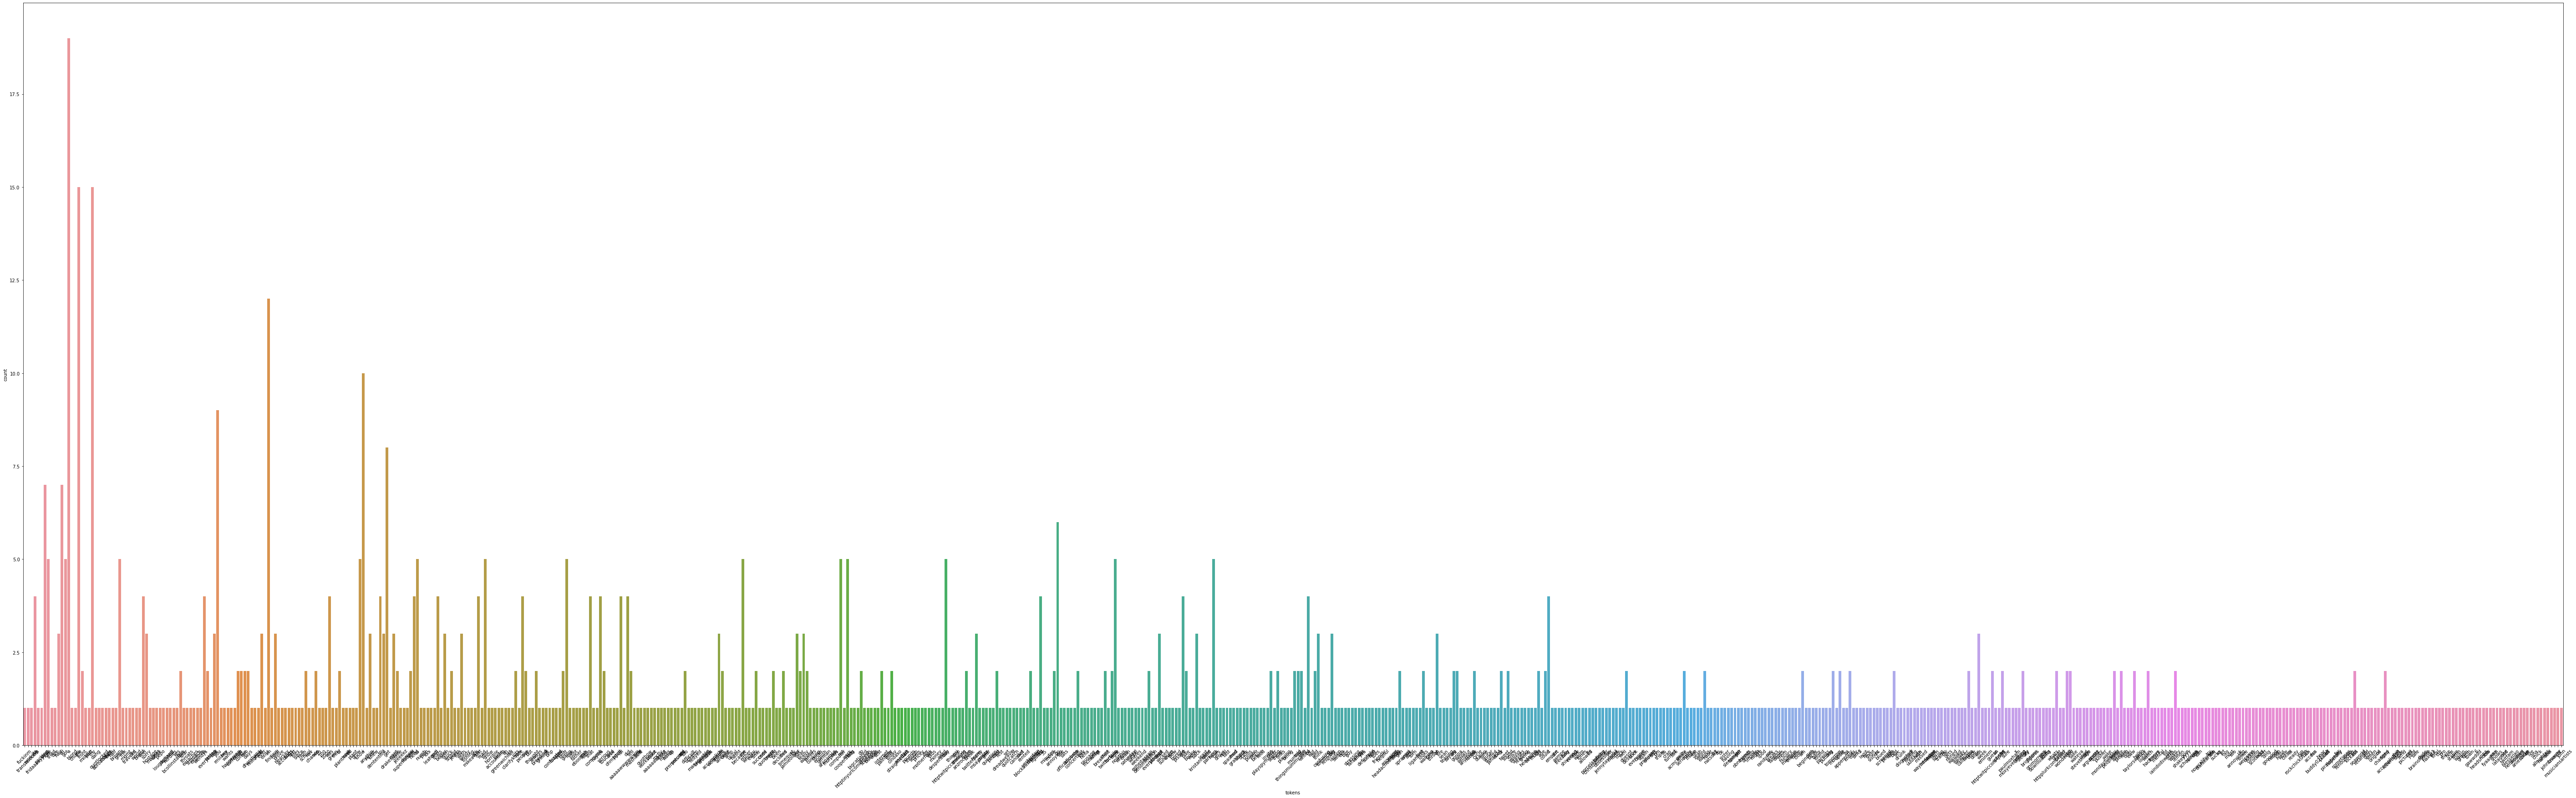

In [31]:
plot_words(anger_tokens)

# Machine Learning And Model Training

In [32]:
#from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix
from sklearn.model_selection import train_test_split

In [33]:
xfeatures = data['content']
ylabel = data['sentiment']

In [34]:
cv = CountVectorizer()
X=cv.fit_transform(xfeatures)


In [35]:
cv.get_feature_names()

['00',
 '000',
 '0003',
 '002',
 '006',
 '01',
 '010',
 '0128',
 '01theone',
 '02',
 '023',
 '024',
 '0255',
 '03',
 '04',
 '0405',
 '04182012154',
 '0430',
 '05',
 '050',
 '050809',
 '0530',
 '0531',
 '06',
 '0600',
 '062709',
 '0630',
 '07',
 '079ï',
 '07i',
 '08',
 '080509',
 '080809',
 '09',
 '0909',
 '0930',
 '09casper',
 '0f',
 '0kenjoy',
 '0n',
 '0o',
 '0omiriamo0',
 '0oze',
 '0quot',
 '0rpm',
 '0s',
 '0ut',
 '0xcafebabe',
 '10',
 '100',
 '1000',
 '10000',
 '100000',
 '10000000000',
 '100000000000000000000000000000000000',
 '10000th',
 '1000th',
 '1000x',
 '1008',
 '100msgsecond',
 '100rabh',
 '100th',
 '100word',
 '100x',
 '101',
 '1010',
 '1011',
 '1011pm',
 '1012',
 '1015',
 '1017',
 '102',
 '1024',
 '1027',
 '1027kiisfm',
 '1029',
 '103',
 '1030',
 '1030am',
 '1030lammmeeee',
 '1030pm',
 '103ffevered',
 '104',
 '1040',
 '1045',
 '1045chumfm',
 '105',
 '1050i',
 '1057',
 '105744',
 '105all',
 '106',
 '106jackfm',
 '1073',
 '1075',
 '108',
 '109',
 '1095',
 '10am',
 '10and',
 

In [36]:
x_train,x_test,y_train,y_test = train_test_split(X,ylabel,test_size=0.3,random_state=42)

In [37]:
model = MultinomialNB()
model.fit(x_train,y_train)

MultinomialNB()

In [38]:
scores = []

In [39]:
scores.append(model.score(x_train,y_train)*100)
scores

[57.43214285714286]

In [40]:
y_predict = model.predict(x_test)
y_predict

array(['happiness', 'neutral', 'worry', ..., 'worry', 'worry', 'worry'],
      dtype='<U10')

In [41]:
check = [data['content'][5]]
print(check)

['repinging ghostridah14 didnt go prom bc bf didnt like friends']


In [42]:
vector = cv.transform(check).toarray()

In [43]:
model.predict(vector)

array(['worry'], dtype='<U10')

In [44]:
data['sentiment'][5]

'worry'

In [45]:
model.predict_proba(vector)

array([[7.98155333e-12, 4.82053954e-10, 3.07297611e-08, 6.00251430e-09,
        2.68935838e-05, 3.60881405e-03, 4.45261759e-05, 1.19481145e-03,
        1.39779172e-02, 3.93192426e-06, 4.64548982e-02, 2.20410081e-05,
        9.34666129e-01]])

In [46]:
model.classes_

array(['anger', 'boredom', 'empty', 'enthusiasm', 'fun', 'happiness',
       'hate', 'love', 'neutral', 'relief', 'sadness', 'surprise',
       'worry'], dtype='<U10')

In [47]:
np.max(model.predict_proba(vector)) #maximum Probability

0.9346661291973942

In [48]:
def prediction(text,model):
    vectors = cv.transform([text])
    predict_model_text = model.predict(vectors)
    predict_proba = model.predict_proba(vectors)
    prediction_percentage = dict(zip(model.classes_,predict_proba[0]))
    print("Prediction : ",predict_model_text[0])
    print("Prediction Score : ",np.max(predict_proba))
    return prediction_percentage
    

Prediction :  worry
Prediction Score :  0.9346661291973942
[7.981553327738102e-12,
 4.820539540606276e-10,
 3.072976107390477e-08,
 6.002514300532082e-09,
 2.689358383630433e-05,
 0.003608814054262191,
 4.4526175940141776e-05,
 0.0011948114460662506,
 0.013977917173702125,
 3.931924260529328e-06,
 0.04645489821417403,
 2.204100805575103e-05,
 0.9346661291973942]


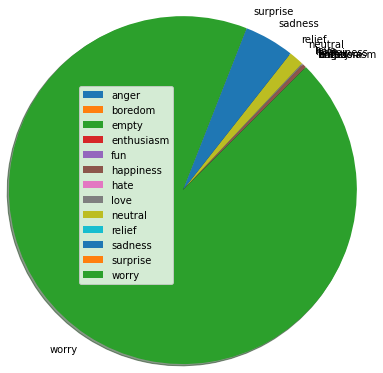

In [49]:
m = prediction(data['content'][5],model)
activites = []
activites = m.keys()
slices = []
for x in activites:
    slices.append(m[x])
pprint.pprint(slices)
plt.pie(slices, labels = activites, 
        startangle=45, shadow = True,
        radius = 2)
plt.legend()
plt.show()

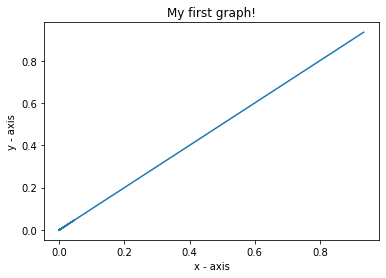

In [50]:
x = slices
y = slices
plt.plot(x, y)
plt.xlabel('x - axis')
plt.ylabel('y - axis')
plt.title('My first graph!')
plt.show()

# Model Evaluation

In [51]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

       anger       0.00      0.00      0.00        33
     boredom       0.00      0.00      0.00        57
       empty       0.14      0.00      0.01       242
  enthusiasm       0.00      0.00      0.00       249
         fun       0.17      0.00      0.00       513
   happiness       0.34      0.29      0.32      1568
        hate       0.40      0.01      0.02       383
        love       0.50      0.31      0.39      1134
     neutral       0.34      0.35      0.35      2620
      relief       0.00      0.00      0.00       515
     sadness       0.29      0.10      0.15      1560
    surprise       0.06      0.00      0.00       625
       worry       0.27      0.73      0.40      2501

    accuracy                           0.31     12000
   macro avg       0.19      0.14      0.13     12000
weighted avg       0.29      0.31      0.26     12000



D:\Artifical Intelligence\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [52]:
print(confusion_matrix(y_test,y_predict))

[[   0    0    0    0    0    2    0    1    7    0    3    0   20]
 [   0    0    0    0    0    2    0    1    9    0    5    0   40]
 [   0    0    1    0    0   16    0    3   90    0    7    1  124]
 [   0    0    0    0    0   30    0    6   78    0    6    0  129]
 [   0    0    0    0    1  104    0   20  126    0   18    0  244]
 [   0    0    0    0    1  460    0  127  374    1   26    3  576]
 [   0    0    1    0    0   12    4    2   54    0   41    1  268]
 [   0    0    0    0    0  200    0  356  181    0   34    0  363]
 [   0    0    3    1    2  220    4   75  924    4   83    7 1297]
 [   0    0    0    0    1   68    0   24  120    0   17    0  285]
 [   0    0    1    0    0   40    0   22  188    0  158    3 1148]
 [   0    0    1    0    1   84    0   23  137    0   18    1  360]
 [   0    0    0    0    0   96    2   49  410    0  123    1 1820]]


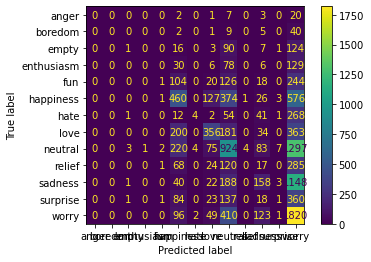

In [53]:
plot_confusion_matrix(model,x_test,y_test)

# Decision Tree

In [54]:
ylabel

0             empty
1           sadness
2           sadness
3        enthusiasm
4           neutral
            ...    
39995       neutral
39996          love
39997          love
39998     happiness
39999          love
Name: sentiment, Length: 40000, dtype: object

In [55]:
CV = CountVectorizer()
x=CV.fit_transform(xfeatures)

In [56]:
CV.get_feature_names()

['00',
 '000',
 '0003',
 '002',
 '006',
 '01',
 '010',
 '0128',
 '01theone',
 '02',
 '023',
 '024',
 '0255',
 '03',
 '04',
 '0405',
 '04182012154',
 '0430',
 '05',
 '050',
 '050809',
 '0530',
 '0531',
 '06',
 '0600',
 '062709',
 '0630',
 '07',
 '079ï',
 '07i',
 '08',
 '080509',
 '080809',
 '09',
 '0909',
 '0930',
 '09casper',
 '0f',
 '0kenjoy',
 '0n',
 '0o',
 '0omiriamo0',
 '0oze',
 '0quot',
 '0rpm',
 '0s',
 '0ut',
 '0xcafebabe',
 '10',
 '100',
 '1000',
 '10000',
 '100000',
 '10000000000',
 '100000000000000000000000000000000000',
 '10000th',
 '1000th',
 '1000x',
 '1008',
 '100msgsecond',
 '100rabh',
 '100th',
 '100word',
 '100x',
 '101',
 '1010',
 '1011',
 '1011pm',
 '1012',
 '1015',
 '1017',
 '102',
 '1024',
 '1027',
 '1027kiisfm',
 '1029',
 '103',
 '1030',
 '1030am',
 '1030lammmeeee',
 '1030pm',
 '103ffevered',
 '104',
 '1040',
 '1045',
 '1045chumfm',
 '105',
 '1050i',
 '1057',
 '105744',
 '105all',
 '106',
 '106jackfm',
 '1073',
 '1075',
 '108',
 '109',
 '1095',
 '10am',
 '10and',
 

In [57]:
X_train,X_test,Y_train,Y_test = train_test_split(x,ylabel,test_size=0.3,random_state=42)

In [58]:
from sklearn import tree

In [59]:
decision_tree = tree.DecisionTreeClassifier(random_state=42, max_depth=400)

In [60]:
decision_tree = decision_tree.fit(X_train, Y_train)

In [61]:
scores.append(decision_tree.score(X_train, Y_train)*100)
scores[1]

93.37857142857143

In [62]:
Y_predict = decision_tree.predict(X_test)
Y_predict

array(['neutral', 'neutral', 'neutral', ..., 'worry', 'worry', 'sadness'],
      dtype=object)

In [63]:
check = [data['content'][2]]
vector = CV.transform(check).toarray()
model.predict(vector)

array(['sadness'], dtype='<U10')

In [64]:
data['sentiment'][2]

'sadness'

In [65]:
decision_tree

DecisionTreeClassifier(max_depth=400, random_state=42)

# Decision Tree Model Evaluation

In [66]:
print(classification_report(Y_test,Y_predict))

              precision    recall  f1-score   support

       anger       0.00      0.00      0.00        33
     boredom       0.00      0.00      0.00        57
       empty       0.01      0.00      0.01       242
  enthusiasm       0.03      0.01      0.01       249
         fun       0.08      0.05      0.07       513
   happiness       0.27      0.32      0.29      1568
        hate       0.23      0.18      0.20       383
        love       0.36      0.31      0.34      1134
     neutral       0.33      0.49      0.40      2620
      relief       0.12      0.06      0.08       515
     sadness       0.26      0.22      0.24      1560
    surprise       0.08      0.05      0.06       625
       worry       0.30      0.31      0.30      2501

    accuracy                           0.28     12000
   macro avg       0.16      0.15      0.15     12000
weighted avg       0.26      0.28      0.27     12000



In [67]:
print(confusion_matrix(Y_test,Y_predict))

[[   0    0    0    0    2    1    1    0   12    1    7    5    4]
 [   0    0    1    0    1    6    1    3   22    0    8    1   14]
 [   0    0    1    1    5   26    5   15  109    7   17    5   51]
 [   0    0    0    2   12   44    3   14   86    5   20    9   54]
 [   0    0    1    4   28  126    8   34  151   17   45   11   88]
 [   1    2    7   15   77  494   11  176  390   60   95   53  187]
 [   0    0    3    1    6   20   70   11   96    4   58   13  101]
 [   0    0    5    9   19  251   11  357  229   24   76   37  116]
 [   1   10   15   17   63  285   41  100 1279   37  203   71  498]
 [   0    2    9    5   16  100    3   46  169   32   38   11   84]
 [   1    7   15    5   33  119   53   63  366   24  336   58  480]
 [   0    3    6    4   19  110   14   51  198   10   45   31  134]
 [   1    8   18   12   64  237   80  116  730   55  343   74  763]]


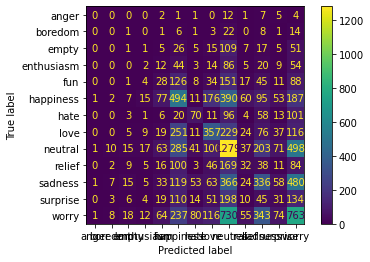

In [68]:
plot_confusion_matrix(decision_tree,X_test,Y_test)

# Random Forest

In [69]:
CV = CountVectorizer()
x=CV.fit_transform(xfeatures)

In [70]:
CV.get_feature_names()

['00',
 '000',
 '0003',
 '002',
 '006',
 '01',
 '010',
 '0128',
 '01theone',
 '02',
 '023',
 '024',
 '0255',
 '03',
 '04',
 '0405',
 '04182012154',
 '0430',
 '05',
 '050',
 '050809',
 '0530',
 '0531',
 '06',
 '0600',
 '062709',
 '0630',
 '07',
 '079ï',
 '07i',
 '08',
 '080509',
 '080809',
 '09',
 '0909',
 '0930',
 '09casper',
 '0f',
 '0kenjoy',
 '0n',
 '0o',
 '0omiriamo0',
 '0oze',
 '0quot',
 '0rpm',
 '0s',
 '0ut',
 '0xcafebabe',
 '10',
 '100',
 '1000',
 '10000',
 '100000',
 '10000000000',
 '100000000000000000000000000000000000',
 '10000th',
 '1000th',
 '1000x',
 '1008',
 '100msgsecond',
 '100rabh',
 '100th',
 '100word',
 '100x',
 '101',
 '1010',
 '1011',
 '1011pm',
 '1012',
 '1015',
 '1017',
 '102',
 '1024',
 '1027',
 '1027kiisfm',
 '1029',
 '103',
 '1030',
 '1030am',
 '1030lammmeeee',
 '1030pm',
 '103ffevered',
 '104',
 '1040',
 '1045',
 '1045chumfm',
 '105',
 '1050i',
 '1057',
 '105744',
 '105all',
 '106',
 '106jackfm',
 '1073',
 '1075',
 '108',
 '109',
 '1095',
 '10am',
 '10and',
 

In [71]:
X_train,X_test,Y_train,Y_test = train_test_split(x,ylabel,test_size=0.3,random_state=42)

In [72]:
from sklearn import ensemble 

In [73]:
random_forest = ensemble.RandomForestClassifier(n_estimators=10)

In [74]:
random_forest = random_forest.fit(X_train,Y_train)

In [75]:
scores.append(random_forest.score(X_train,Y_train)*100)
scores[2]

97.875

In [76]:
Y_predict = random_forest.predict(X_test)
Y_predict

array(['neutral', 'neutral', 'worry', ..., 'worry', 'neutral', 'sadness'],
      dtype=object)

In [77]:
check = [data['content'][2]]
vector = CV.transform(check).toarray()
model.predict(vector)

array(['sadness'], dtype='<U10')

In [78]:
data['sentiment'][2]

'sadness'

In [79]:
random_forest

RandomForestClassifier(n_estimators=10)

# Random Forest Evaluation

In [80]:
print(classification_report(Y_test,Y_predict))

              precision    recall  f1-score   support

       anger       0.00      0.00      0.00        33
     boredom       0.00      0.00      0.00        57
       empty       0.01      0.00      0.01       242
  enthusiasm       0.06      0.02      0.03       249
         fun       0.10      0.04      0.06       513
   happiness       0.26      0.31      0.28      1568
        hate       0.25      0.14      0.18       383
        love       0.37      0.34      0.35      1134
     neutral       0.32      0.56      0.40      2620
      relief       0.10      0.04      0.06       515
     sadness       0.27      0.19      0.23      1560
    surprise       0.09      0.03      0.04       625
       worry       0.32      0.29      0.30      2501

    accuracy                           0.29     12000
   macro avg       0.16      0.15      0.15     12000
weighted avg       0.26      0.29      0.26     12000



In [81]:
print(confusion_matrix(Y_test,Y_predict))

[[   0    0    2    0    0    2    2    1   13    1    5    0    7]
 [   0    0    0    0    0    4    2    2   22    0    9    2   16]
 [   1    1    1    3    2   26    2    8  125    7   13    4   49]
 [   0    0    0    4    3   50    2   12  116    1   11    7   43]
 [   1    0    4    1   23  145   10   37  162   14   30    5   81]
 [   0    0   12   16   43  479    7  189  535   35   57   23  172]
 [   0    0    3    2    8   17   54   10  119    3   60   11   96]
 [   0    0    5    5   25  257   10  384  275   20   47   14   92]
 [   0    1   21   12   49  270   23  118 1473   35  168   39  411]
 [   0    0   11    7   10   94    4   52  194   21   35    6   81]
 [   0    2   14    5   23  134   38   70  490   19  302   27  436]
 [   0    0    3    5   12  121    9   50  236    9   55   17  108]
 [   1    3   16   10   34  239   55  107  901   41  330   29  735]]


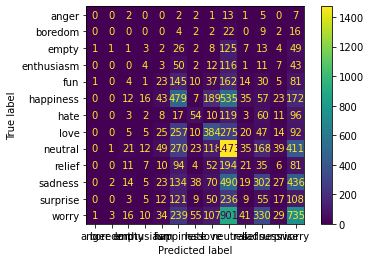

In [82]:
plot_confusion_matrix(random_forest,X_test,Y_test)

# Linear Regression Model

In [83]:
CV = CountVectorizer()
x=CV.fit_transform(xfeatures)

In [84]:
CV.get_feature_names()

['00',
 '000',
 '0003',
 '002',
 '006',
 '01',
 '010',
 '0128',
 '01theone',
 '02',
 '023',
 '024',
 '0255',
 '03',
 '04',
 '0405',
 '04182012154',
 '0430',
 '05',
 '050',
 '050809',
 '0530',
 '0531',
 '06',
 '0600',
 '062709',
 '0630',
 '07',
 '079ï',
 '07i',
 '08',
 '080509',
 '080809',
 '09',
 '0909',
 '0930',
 '09casper',
 '0f',
 '0kenjoy',
 '0n',
 '0o',
 '0omiriamo0',
 '0oze',
 '0quot',
 '0rpm',
 '0s',
 '0ut',
 '0xcafebabe',
 '10',
 '100',
 '1000',
 '10000',
 '100000',
 '10000000000',
 '100000000000000000000000000000000000',
 '10000th',
 '1000th',
 '1000x',
 '1008',
 '100msgsecond',
 '100rabh',
 '100th',
 '100word',
 '100x',
 '101',
 '1010',
 '1011',
 '1011pm',
 '1012',
 '1015',
 '1017',
 '102',
 '1024',
 '1027',
 '1027kiisfm',
 '1029',
 '103',
 '1030',
 '1030am',
 '1030lammmeeee',
 '1030pm',
 '103ffevered',
 '104',
 '1040',
 '1045',
 '1045chumfm',
 '105',
 '1050i',
 '1057',
 '105744',
 '105all',
 '106',
 '106jackfm',
 '1073',
 '1075',
 '108',
 '109',
 '1095',
 '10am',
 '10and',
 

In [85]:
X_train,X_test,Y_train,Y_test = train_test_split(x,ylabel,test_size=0.3,random_state=42)

In [86]:
from sklearn import linear_model
from sklearn import preprocessing


In [87]:
le = preprocessing.LabelEncoder()

In [88]:
Y_train = le.fit_transform(Y_train)

In [89]:
linear_reg = linear_model.LinearRegression()

In [90]:
linear_reg = linear_reg.fit(X_train,Y_train)

In [91]:
scores.append(linear_reg.score(X_train,Y_train)*100)
scores[3]

93.49696629573116

In [92]:
Y_train = le.inverse_transform(Y_train)

In [93]:
Y_predict = linear_reg.predict(X_test)
Y_predict

array([ 7.75432971,  5.97624739, -3.40611854, ...,  7.73062413,
        3.95971885, 10.59006519])

In [94]:
check = [data['content'][2]]
vector = CV.transform(check).toarray()
model.predict(vector)

array(['sadness'], dtype='<U10')

In [95]:
data['sentiment'][2]

'sadness'

In [96]:
linear_reg

LinearRegression()

# Linear Regression Evaluation

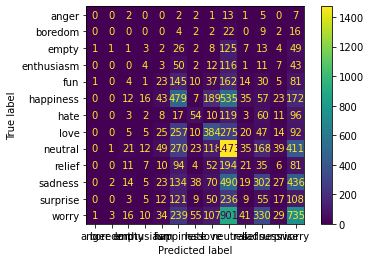

In [99]:
plot_confusion_matrix(random_forest,X_test,Y_test)

# Comparison

In [101]:
scores

[57.43214285714286, 93.37857142857143, 97.875, 93.49696629573116]

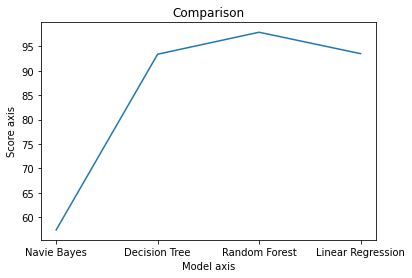

In [108]:
x = ['Navie Bayes','Decision Tree','Random Forest','Linear Regression']
y = scores
plt.plot(x,y)
plt.title('Comparison')
plt.ylabel('Score axis')
plt.xlabel('Model axis')
plt.show()

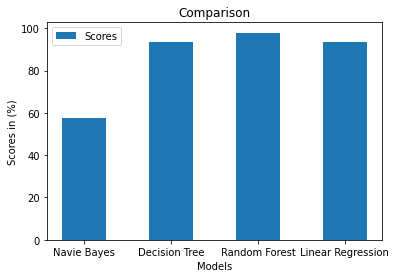

In [115]:
plt.bar(['Navie Bayes','Decision Tree','Random Forest','Linear Regression'],scores,
label="Scores",width=.5)

plt.legend()
plt.xlabel('Models')
plt.ylabel('Scores in (%)')
plt.title('Comparison')
plt.show()